In [1]:
import torch
print(torch.cuda.is_available())  # Debe devolver True
print(torch.cuda.get_device_name(0))  # Debe mostrar "RTX 4090"

True
NVIDIA GeForce RTX 4090


In [3]:
from ultralytics import YOLO
model = YOLO("yolo11l.pt")
model.train(
    data="data.yaml",
    epochs=60,
    imgsz=640,
    device=0,
    batch=32,
    name="skin_cancer",
)

Ultralytics 8.3.99  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=data.yaml, epochs=60, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=skin_cancer2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

RuntimeError: Dataset 'data.yaml' error  
Dataset 'data.yaml' images not found , missing path 'C:\Users\Raxielh\Documents\GitHub\ModeloClasificadorMadurezPlatano\datasets\valid\images'
Note dataset download directory is 'C:\Users\Raxielh\Documents\GitHub\ModeloClasificadorMadurezPlatano\datasets'. You can update this in 'C:\Users\Raxielh\AppData\Roaming\Ultralytics\settings.json'

In [6]:
import torch
torch.cuda.empty_cache()
torch.cuda.ipc_collect()
device = torch.device("cuda")

🔹 Usando dispositivo: cuda
✅ Modelo cargado correctamente.

image 1/1 C:\Users\Raxielh\Documents\GitHub\ModeloClasificadorMadurezPlatano\upload\uploaded_image.jpg: 640x480 1 unripe, 48.2ms
Speed: 3.3ms preprocess, 48.2ms inference, 58.2ms postprocess per image at shape (1, 3, 640, 480)


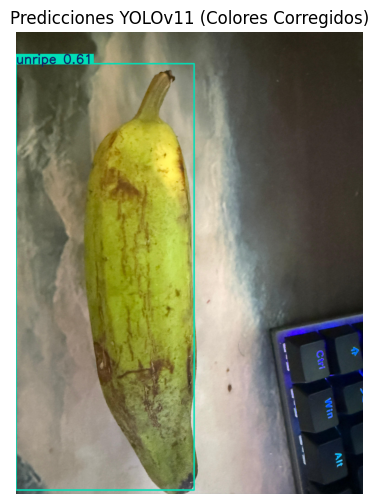

,clase,confianza,coordenadas
0,unripe,0.61,"[0.0, 276.8, 1552.26, 3997.75]"


📌 Detecciones:
🔹 Clase: unripe | Confianza: 0.61 | Coordenadas: [0.0, 276.8, 1552.26, 3997.75]


In [7]:
# 📌 Cargar librerías necesarias
from ultralytics import YOLO
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Configurar visualización en Jupyter Notebook
%matplotlib inline  

# 📌 Configurar dispositivo (GPU si está disponible)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🔹 Usando dispositivo: {device}")

# 📌 Cargar el modelo YOLO entrenado
modelo_path = r"C:\Users\Raxielh\Documents\GitHub\ModeloClasificadorMadurezPlatano\runs\detect\platano\weights\best.pt"
model = YOLO(modelo_path).to(device)
print("✅ Modelo cargado correctamente.")

# 📌 Ruta de la imagen a predecir (MODIFICA ESTO)
image_path = r"C:\Users\Raxielh\Documents\GitHub\ModeloClasificadorMadurezPlatano\upload\uploaded_image.jpg"

# 📌 Realizar la predicción
results = model(image_path, device=device)

# 📌 Obtener el primer resultado
result = results[0]

# 📌 Convertir la imagen de BGR a RGB para evitar colores raros
image_with_boxes = cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB)

# 📌 Visualizar la imagen correctamente en Jupyter Notebook
plt.figure(figsize=(10, 6))
plt.imshow(image_with_boxes)
plt.axis("off")
plt.title("Predicciones YOLOv11 (Colores Corregidos)")
plt.show()

# 📌 Obtener los datos de detección
detections = result.boxes  # Bounding boxes
class_names = result.names  # Nombres de clases

# 📌 Extraer información de las detecciones en un diccionario estructurado
detected_objects = []
for box in detections:
    obj = {
        "clase": class_names[int(box.cls)],
        "confianza": round(box.conf.item(), 2),
        "coordenadas": [round(coord, 2) for coord in box.xyxy.tolist()[0]]
    }
    detected_objects.append(obj)

# 📌 Mostrar los resultados en un DataFrame para mejor visualización
import pandas as pd
df_detecciones = pd.DataFrame(detected_objects)
display(df_detecciones)

# 📌 Imprimir resultados en consola
print("📌 Detecciones:")
for obj in detected_objects:
    print(f"🔹 Clase: {obj['clase']} | Confianza: {obj['confianza']} | Coordenadas: {obj['coordenadas']}")


In [6]:
import base64

# Ruta de la imagen
image_path = r"C:\Users\Raxielh\Documents\GitHub\ModeloClasificadorMadurezPlatano\upload\uploaded_image.jpg"

# Convertir la imagen a base64
with open(image_path, "rb") as image_file:
    base64_string = base64.b64encode(image_file.read()).decode('utf-8')
base64_txt_path = "./image_base64.txt"
with open(base64_txt_path, "w") as text_file:
    text_file.write(base64_string)
